# Graph Theory Module 1 Computational Challenge

In [2]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def is_connected(A, D):
    eigval = np.linalg.eig(D-A)[0] # The multiplicity of the zero eigenvalue of the Laplacian is the number of components.
    zeros = np.count_nonzero(eigval<=1e-12) # Accounting for floating point error.
    if(zeros == 1):
        return True
    else:
        return False

def generate_connected_graph(N,K):
    A = np.zeros((N,N))
    D = np.zeros((N,N))
    edges = []
    
    while(True):
        i, j = random.sample(range(0,N), 2)
        if(A[i,j] == 0 and A[j,i] == 0):
            edges.append((i,j))
            edges.append((j,i))
            A[i,j] = 1
            A[j,i] = 1
            D[i,i] += 1
            D[j,j] += 1
        if(is_connected(A, D) and len(edges) >= K):
            return A, D, edges

def diagonalize(M): # We can diagonalize a matrix with unique eigenvalues as A = PDP^-1, where D has eigenvalues down the main diagonal and P has eigenvectors as columns.
    eigval, eigvec = np.linalg.eig(M)

    D = np.diag(eigval)
    P = np.row_stack(eigvec)
    return P, D

def loop_prob(A,l):
    L = np.linalg.matrix_power(A,l)
    return [L[i,i]/np.sum(L[i,:]) for i in range(0,N)]
    

In [16]:
# N = 7
# min_K = 11

# A, D, K = generate_connected_graph(N,min_K) # adjacency, degree, edges
# A, D, K

In [15]:
# D_P, D_D = diagonalize(D) # D_P = degree matrix P, D_D = degree matrix D
# A_P, A_D = diagonalize(A) # A_P = adjacency matrix P, A_D = adjacency matrix D
# D_D, np.round(A_D,1)

100: [0.157 0.157 0.056 0.152 0.155 0.172 0.152]
A:
 [[ 3.059  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -2.172  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -2.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     1.187  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.468  0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.542]]
D:
 [[3. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 3.]]


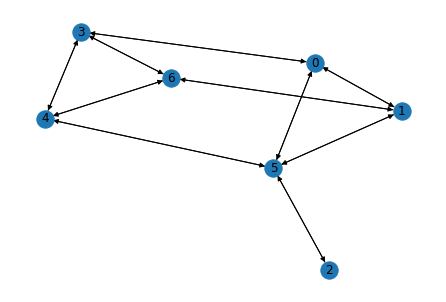


------------------------

REMOVED: (6, 3)
100: [0.162 0.172 0.065 0.108 0.154 0.19  0.149]
A:
 [[ 2.91   0.     0.     0.     0.     0.     0.   ]
 [ 0.    -2.2    0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.777  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.63   0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.899  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.334  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.465]]
D:
 [[3. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


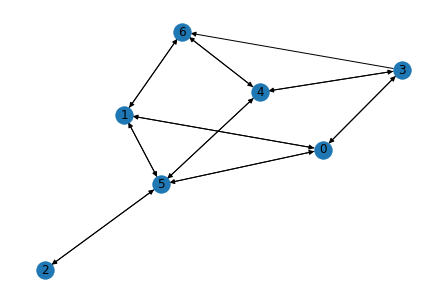


------------------------

REMOVED: (1, 6)
100: [0.179 0.173 0.074 0.118 0.151 0.207 0.097]
A:
 [[ 2.789  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -2.157  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.501  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.911  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.515  0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.472]]
D:
 [[3. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


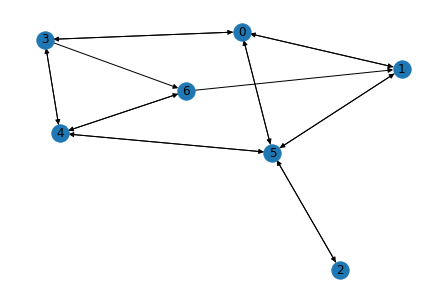


------------------------

REMOVED: (0, 3)
100: [0.191 0.197 0.093 0.056 0.145 0.241 0.077]
A:
 [[ 2.59 +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j    -2.066+0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     1.148+0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j    -1.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j    -0.557+0.239j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  -0.557-0.239j  0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.443+0.j   ]]
D:
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


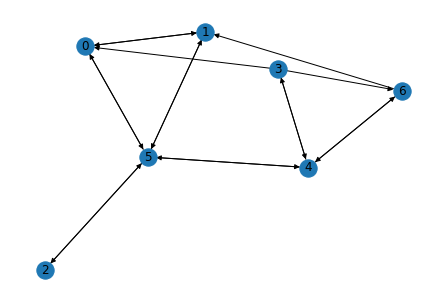


------------------------

REMOVED: (4, 3)
100: [0.203 0.219 0.113 0.    0.136 0.275 0.056]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     2.437  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.975  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.643  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.431  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.75 ]]
D:
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


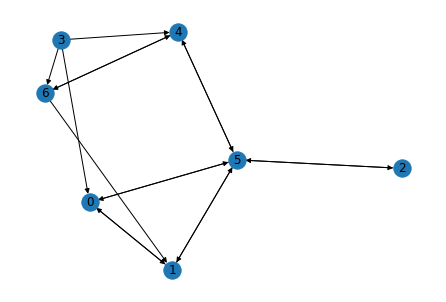


------------------------

REMOVED: (5, 2)
100: [0.237 0.258 0.    0.    0.154 0.284 0.067]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     2.284  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.785  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.751  0.     0.   ]
 [ 0.     0.     0.     0.     0.    -1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.318]]
D:
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


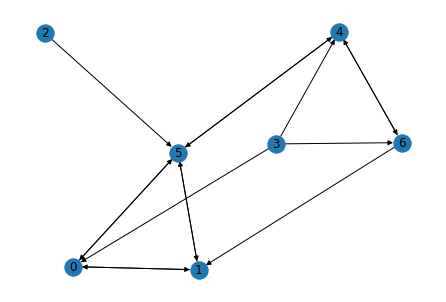


------------------------

REMOVED: (0, 1)
100: [0.235 0.188 0.    0.    0.188 0.297 0.091]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     2.061  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.764  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.694  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.396  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


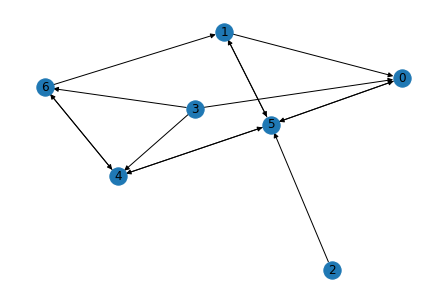


------------------------

REMOVED: (6, 4)
100: [0.257 0.197 0.    0.    0.157 0.31  0.08 ]
A:
 [[ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     1.973+0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.144+0.673j  0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.144-0.673j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  -0.674+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j    -1.586+0.j   ]]
D:
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


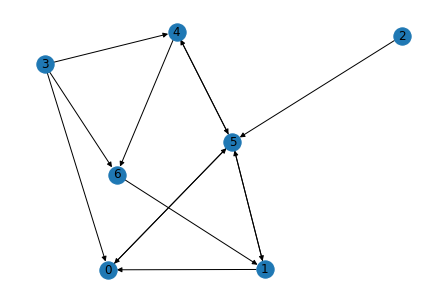


------------------------

REMOVED: (5, 1)
100: [0.255 0.079 0.    0.    0.206 0.333 0.127]
A:
 [[ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     1.618+0.j     0.   +0.j     0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.233+0.793j  0.   +0.j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.233-0.793j
   0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
  -1.466+0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j
   0.   +0.j    -0.618+0.j   ]]
D:
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


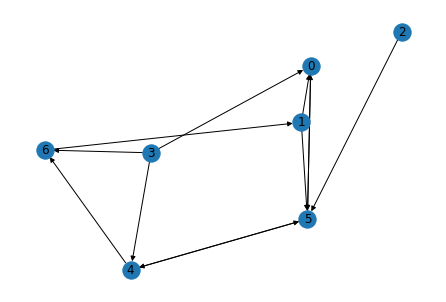


------------------------

REMOVED: (4, 6)
100: [0.5 0.  0.  0.  0.5 1.  0. ]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.414  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     1.414]]
D:
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


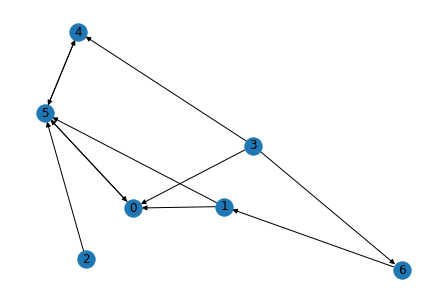


------------------------

REMOVED: (0, 5)
100: [nan 0.  0.  0.  0.5 1.  0. ]
A:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
D:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


/Users/bracho/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


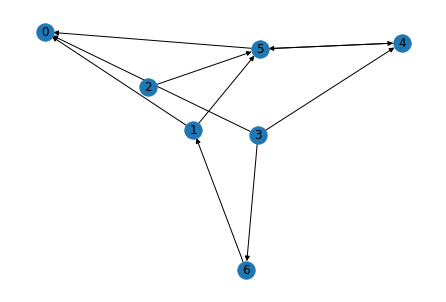


------------------------

REMOVED: (5, 4)
100: [nan nan nan nan nan nan nan]
A:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
D:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


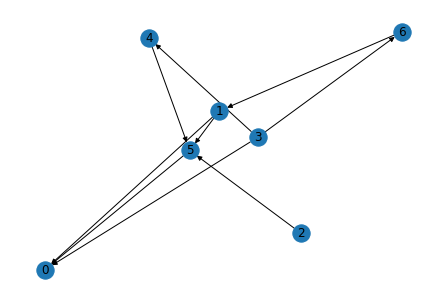


------------------------

REMOVED: (3, 6)
100: [nan nan nan nan nan nan nan]
A:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
D:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


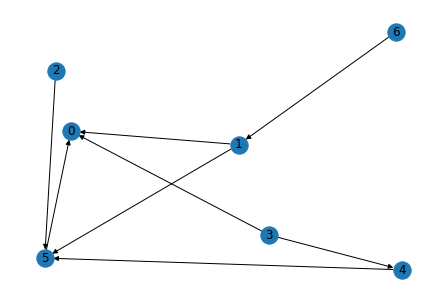


------------------------

REMOVED: (3, 4)
100: [nan nan nan nan nan nan nan]
A:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
D:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


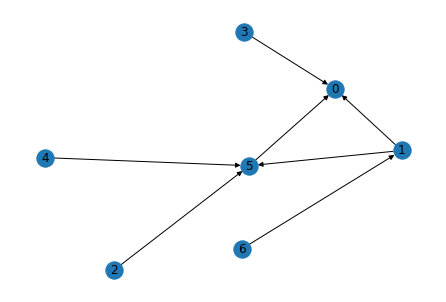


------------------------

REMOVED: (1, 0)


In [14]:
%matplotlib inline
N = 7
min_K = 11
A, D, K = generate_connected_graph(N,min_K) # adjacency, degree, edges

while(True):
    A_P, A_D = diagonalize(A) # A_P = adjacency matrix P, A_D = adjacency matrix D
    print("100:", np.round(loop_prob(A, 100),3))
    print("A:\n",np.round(A_D, 3))
    print("D:\n",D) # The degree matrix is already diagonalized.
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)  
    nx.draw(G, with_labels=True)
    plt.show()
    print("\n------------------------\n")
    
    # remove edge but maintain connectedness
    while(True):
        random.shuffle(K)
        A_r = np.copy(A)
        D_r = np.copy(D)
        A_r[K[0][0], K[0][1]] = 0
        D_r[K[0][0], K[0][0]] -= 1
        if(is_connected(A_r, D_r)):
            print("REMOVED:", K[0])
            K = K[1:]
            A = A_r
            D = D_r
            break
    if(len(K) <= N-1):
        break